EDA
---

Let's take a look at the past 7 seasons and see what trends and insights we can find prior to modeling.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pybaseball as pb
from pybaseball import cache

pd.set_option('display.max_rows', None, 'display.max_columns', None)

cache.enable()

In [7]:
df = pd.read_csv('past_seasons_concatenated_cleaned.csv')

In [8]:
df.head()

,release_speed,release_pos_x,release_pos_z,stand,p_throws,type,pfx_x,pfx_z,plate_x,plate_z,vx0,vy0,vz0,ax,ay,az,release_spin_rate,pitch_name
0,96.1,-1.92,5.95,R,R,S,-0.27,1.70,-0.93,1.62,3.08,-139.61,-9.72,-2.03,34.78,-11.71,2463.0,4-Seam Fastball
1,93.6,-1.25,6.06,R,R,B,0.32,0.80,2.92,2.23,10.09,-135.73,-5.82,6.08,26.36,-24.25,2724.0,Cutter
2,97.6,-1.45,6.22,L,R,B,-0.26,1.52,-0.85,3.15,2.00,-141.92,-6.17,-1.82,34.59,-13.48,2255.0,4-Seam Fastball
3,92.0,-1.77,6.12,L,R,S,0.23,0.80,-0.05,2.70,3.69,-133.89,-4.47,4.71,26.80,-24.40,2755.0,Cutter
4,86.8,-1.56,6.08,R,R,B,0.28,-0.66,-0.10,1.07,2.71,-126.33,-4.10,4.71,26.40,-41.76,2498.0,Knuckle Curve


In [9]:
# Rename
df.rename(columns={'type':'result'}, inplace=True)
# Binary Columns
df['result'] = np.where(df['result'] == 'S', 1, 0)
df['stand'] = np.where(df['stand'] == 'R', 1, 0)
df['p_throws'] = np.where(df['p_throws'] == 'R', 1, 0)

In [11]:
df.head(2)

,release_speed,release_pos_x,release_pos_z,stand,p_throws,result,pfx_x,pfx_z,plate_x,plate_z,vx0,vy0,vz0,ax,ay,az,release_spin_rate,pitch_name
0,96.1,-1.92,5.95,1,1,1,-0.27,1.7,-0.93,1.62,3.08,-139.61,-9.72,-2.03,34.78,-11.71,2463.0,4-Seam Fastball
1,93.6,-1.25,6.06,1,1,0,0.32,0.8,2.92,2.23,10.09,-135.73,-5.82,6.08,26.36,-24.25,2724.0,Cutter


In [10]:
# The 4-seam fast ball is still the most popularly thrown ball
df.pitch_name.value_counts(normalize=True)
# But most calls are made on fast balls

4-Seam Fastball    0.377965
Sinker             0.209418
Slider             0.136479
Changeup           0.093953
Curveball          0.088790
Cutter             0.054516
Knuckle Curve      0.025849
Split-Finger       0.012224
Fastball           0.000231
Knuckleball        0.000212
Eephus             0.000183
Forkball           0.000154
Screwball          0.000028
Name: pitch_name, dtype: float64

In [35]:
# Let's see if the pitch type affects the call
(df.groupby(['pitch_name','result'], sort='result').count()/df.groupby(['pitch_name']).count())['stand']

pitch_name       result
4-Seam Fastball  0         0.649160
                 1         0.350840
Changeup         0         0.770707
                 1         0.229293
Curveball        0         0.643017
                 1         0.356983
Cutter           0         0.687484
                 1         0.312516
Eephus           0         0.778098
                 1         0.221902
Fastball         0         0.689498
                 1         0.310502
Forkball         0         0.852740
                 1         0.147260
Knuckle Curve    0         0.629348
                 1         0.370652
Knuckleball      0         0.644279
                 1         0.355721
Screwball        0         0.773585
                 1         0.226415
Sinker           0         0.640376
                 1         0.359624
Slider           0         0.679304
                 1         0.320696
Split-Finger     0         0.794609
                 1         0.205391
Name: stand, dtype: float64

In [36]:
df.columns

Index(['release_speed', 'release_pos_x', 'release_pos_z', 'stand', 'p_throws',
       'result', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'vx0', 'vy0', 'vz0',
       'ax', 'ay', 'az', 'release_spin_rate', 'pitch_name'],
      dtype='object')

In [45]:
corr_features = ['release_speed', 'release_pos_x', 'release_pos_z', 'stand', 'p_throws',
    'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'vx0', 'vy0', 'vz0',
    'ax', 'ay', 'az', 'release_spin_rate','result']
corr_features2 = ['release_speed', 'release_pos_x', 'release_pos_z', 'stand', 'p_throws',
    'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'release_spin_rate','result']
corr_features3 = ['release_speed', 'release_pos_x', 'release_pos_z', 'stand', 'p_throws',
    'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'vx0', 'vy0', 'vz0',
    'ax', 'ay', 'az', 'release_spin_rate']
corr_features4 = ['release_speed', 'release_pos_x', 'release_pos_z', 'stand', 'p_throws',
    'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'release_spin_rate']

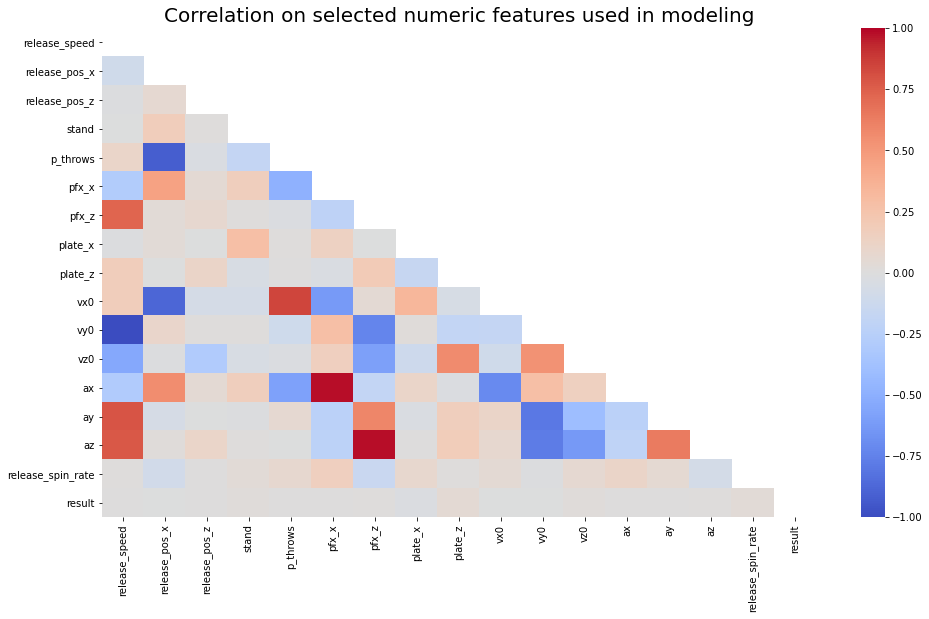

In [39]:
plt.figure(figsize=(16,9))
sns.heatmap(df[corr_features].corr(), cmap='coolwarm', vmin=-1, vmax=1,mask=np.triu(df[corr_features].corr()))
plt.title('Correlation on selected numeric features used in modeling', size=20);

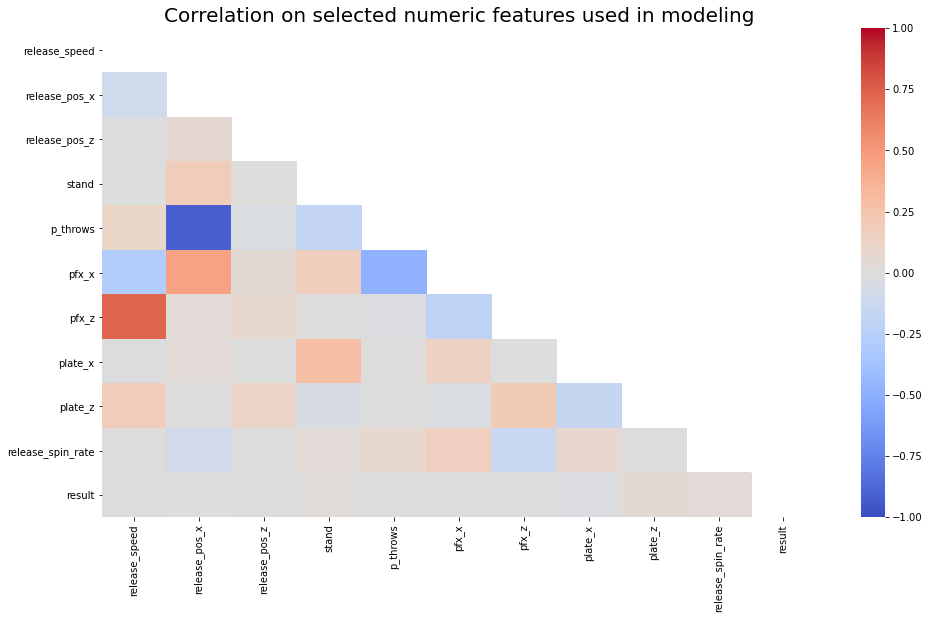

In [42]:
plt.figure(figsize=(16,9))
sns.heatmap(df[corr_features2].corr(), cmap='coolwarm', vmin=-1, vmax=1,mask=np.triu(df[corr_features2].corr()))
plt.title('Correlation on selected numeric features used in modeling', size=20);

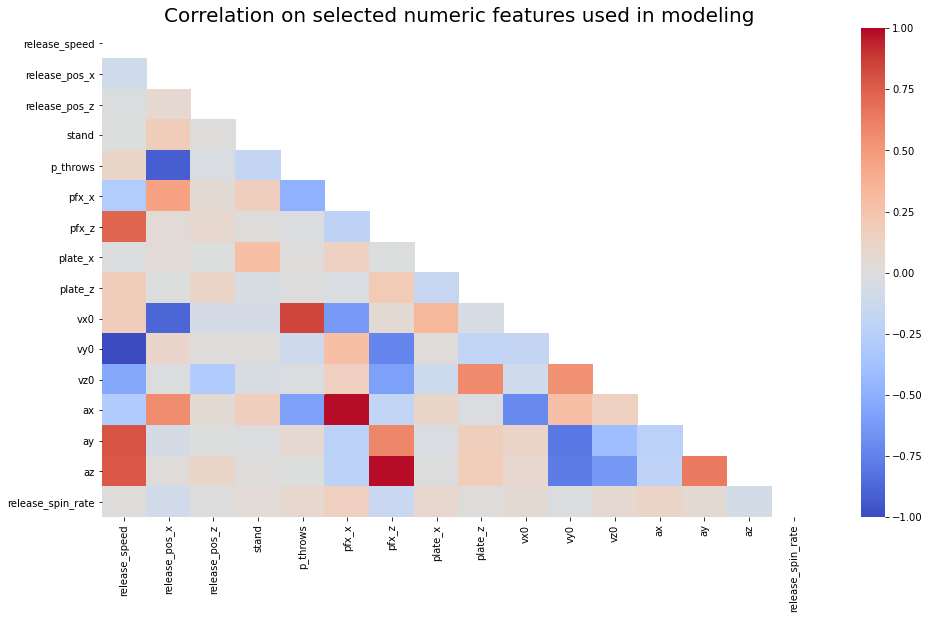

In [44]:
plt.figure(figsize=(16,9))
sns.heatmap(df[corr_features3].corr(), cmap='coolwarm', vmin=-1, vmax=1,mask=np.triu(df[corr_features3].corr()))
plt.title('Correlation on selected numeric features used in modeling', size=20);

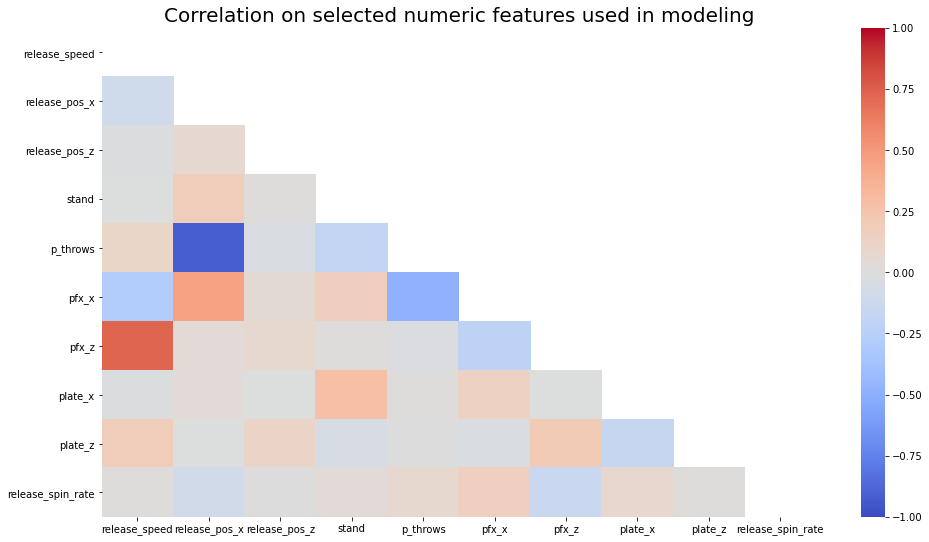

In [46]:
plt.figure(figsize=(16,9))
sns.heatmap(df[corr_features4].corr(), cmap='coolwarm', vmin=-1, vmax=1,mask=np.triu(df[corr_features4].corr()))
plt.title('Correlation on selected numeric features used in modeling', size=20);